"Geo Data Science with Python" 
### Notebook Exercise 8c

---

# k-means Clustering with sklearn

If you work in teams, please indicate your colaborators below!

In [1]:
NAME = ""
COLLABORATORS = ""

---

# Task A: Copy code 

Copy all the packages and code needed to generate synthetic data from Lesson08c in the code cell below

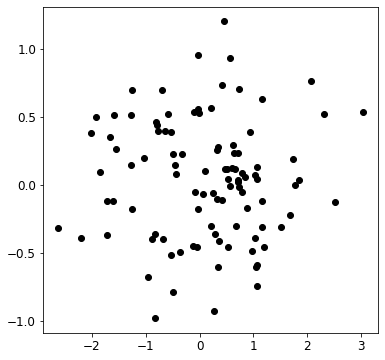

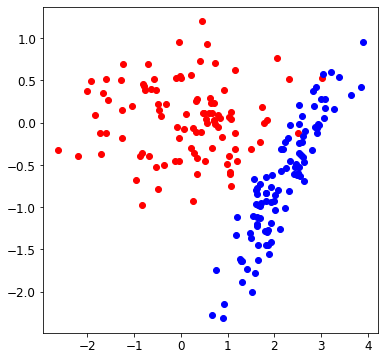

In [56]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [6, 6]

# Training and testing set sizes
n1 = 100 # Train
n2 = 50  # Test

# Random ellipse 1 centered at (0,0)
x = np.random.randn(n1+n2)
y = 0.5*np.random.randn(n1+n2)
x.shape

plt.figure()
plt.plot(x[:n1],y[:n1],'ko')
plt.show()

# Random ellipse 2 centered at (1,-2)
x2 = np.random.randn(n1+n2) + 1
y2 = 0.2*np.random.randn(n1+n2) - 2

# Rotate ellipse 2 by theta
theta = np.pi/4
A = np.zeros((2,2))
A[0,0] = np.cos(theta)
A[0,1] = -np.sin(theta)
A[1,0] = np.sin(theta)
A[1,1] = np.cos(theta)

# Final rotated ellipse
x3 = A[0,0]*x2 + A[0,1]*y2
y3 = A[1,0]*x2 + A[1,1]*y2

plt.figure()
plt.plot(x[:n1],y[:n1],'ro')
plt.plot(x3[:n1],y3[:n1],'bo')
plt.show()

# Training set: first 2 x 100 
X1 = np.column_stack((x3[:n1],y3[:n1]))  # Cluster 1 (blue)
X2 = np.column_stack((x[:n1],y[:n1]))    # Cluster 2 (red)
Y = np.concatenate((X1,X2))                      # data vectors (x1 and x2 values)
Z = np.column_stack((np.ones(n1),2*np.ones(n1))) # labels


# Test set: remaining 2 x 50 points
x1test = np.column_stack((x3[n1:],y3[n1:]))   # test data set 1
x2test = np.column_stack((x[n1:],y[n1:]))     # test data set 2
ytest = np.concatenate((x1test,x2test))  
ztest = np.column_stack((np.ones(n2),2*np.ones(n2))) # test labels



---
# Task B: k-means clustering with sklearn & it's properties

### This is Tutorial 3 from the Lesson08c notebook
(6 points)

The package  `sklearn.cluster` provides a `k-means` **class** that can solve the problem using either Lloyd’s or Elkan’s algorithm. Inspect the code below how to use it.


In [3]:
from sklearn.cluster import KMeans

# kmeans code
kmeans = KMeans(n_clusters=2, random_state=0).fit(Y)  # Compute k-means clustering.
c = kmeans.cluster_centers_

### Apply kmeans class attibutes to answer the following questions

For that, find more details on attibutes of the class `sklearn.cluster.KMeans` on the document pages: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

- How many cluster centers do you get and what are their values?
- Which algorithm is used, if not specified?
- How do you retrieve the labels, and what are they?
- How many iterations did the algorithm run?
- How can you retrieve sum of squared distances?
- What information is stored in `n_features_in_`?

In [4]:
# assigning variables to the attributes to answer the questions below
lab = kmeans.labels_
ite = kmeans.n_iter_
ssd = kmeans.inertia_
feat = kmeans.n_features_in_

#How many cluster centers do you get and what are their values?

print(f'There are 2 cluster centers and their coordinates are: \n{c}')
    

#Which algorithm is used, if not specified?
print("\nBy default, algorithm='auto', which is the Elkan's algortihm.")


#How do you retrieve the labels, and what are they?
print(f"The labels are obtained by calling the 'labels_' attributes, and their values here are: \n{lab}")


#How many iterations did the algorithm run?
print(f"\nThe algorithm run {ite} iterations before converging.")

#How can you retrieve sum of squared distances?
print(f"\nThe sum of squared distances can be derived using the 'inertia_' attriubute. Here, it has the value {ssd:.2f}.")

#What information is stored in `n_features_in_`?: Number of features seen during fit.
print(f"\nThe 'n_features_in_' attribute returns the names of features seen during the fit. There are {feat} names here.")



There are 2 cluster centers and their coordinates are: 
[[-0.28475953 -0.0130067 ]
 [ 2.0199033  -0.5859009 ]]

By default, algorithm='auto', which is the Elkan's algortihm.
The labels are obtained by calling the 'labels_' attributes, and their values here are: 
[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]

The algorithm run 7 iterations before converging.

The sum of squared distances can be derived using the 'inertia_' attriubute. Here, it has the value 189.07.

The 'n_features_in_' attribute returns the names of features seen during the fit. There are 2 names here.


---
# Task C: Checking the accuracy of the results
### This is Tutorial 4 from the Lesson08c notebook

(10 points)

Now, since these are artifically generated data cluster, we can check or validate the results with known input (note, this is usually not possible when working with real data).

We can do this for the training dataset and for the test dataset.

1) Predict clustering for testing data stored in variable `ytest` using kmeans.predict() function (see functionality of the function in the documentation pages). Note: you have to run the predict() function on the instance you created in Task B. The function then returns labels for the prediction dataset that was passed to it.

2) Plot the original test dataset `ytest` (with known labels `ztest`) (color coded by cluster) and compare to results that you get from the kmean-prediction. Tip: You could plot original cluster as scatter with larger circles, and then the kmean prediction results on top using smaller circles, to visualize if cluster label match. Optional: Do the same for training data (`Y` with labels `Z`).

3) Explain what do you see: How accurate is the k-means algorithm?



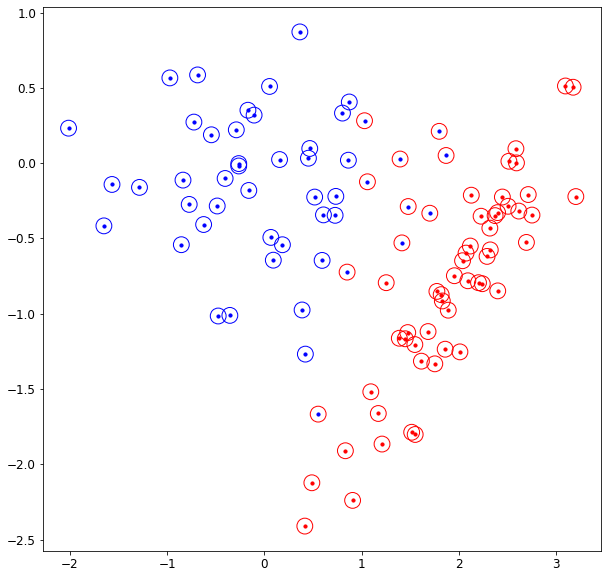

In [125]:

# predicting clustering for the testing data, and creating a mask based on the labels (cluster 1 vs cluster 2)
ytestPredict = kmeans.predict(ytest)
pmask = ytestPredict == 0

# plotting the predicted and original clusters for the test data
plt.figure(figsize=(10,10))
plt.scatter(ytest[pmask,0], ytest[pmask,1], s=250, facecolors='none', edgecolors='b') # kmeans predicted cluster as open circle
plt.scatter(ytest[~pmask,0], ytest[~pmask,1], s=250, facecolors='none', edgecolors='r') # kmeans predicted cluster as open circle
plt.scatter(x1test[:,0], x1test[:,1], s= 10, c = 'red') # original cluster as closed circle 
plt.scatter(x2test[:,0], x2test[:,1], s= 10, c = 'blue') # original cluster as closed circle 

plt.show()

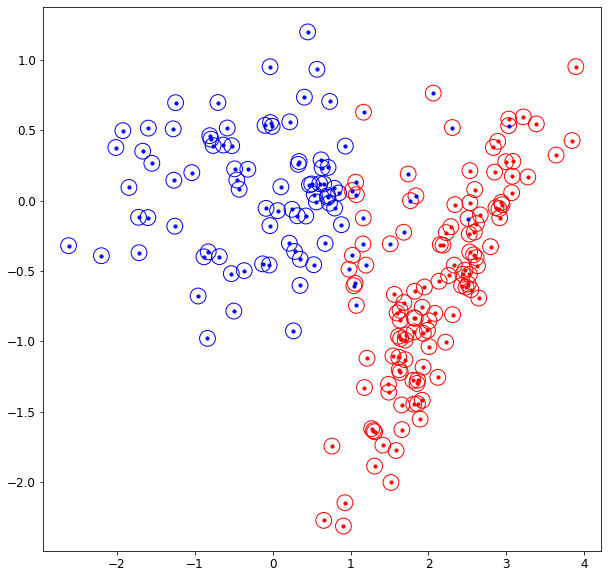

In [124]:

# predicting clustering for the training data, and creating a mask based on the labels (cluster 1 vs cluster 2)
yPredict = kmeans.predict(Y)
pYmask = yPredict == 0

# plotting the predicted and original clusters for the training data
plt.figure(figsize=(10,10))
plt.scatter(Y[pYmask,0], Y[pYmask,1], s=250, facecolors='None', edgecolors='b') # kmeans predicted cluster as open circle
plt.scatter(Y[~pYmask,0], Y[~pYmask,1], s=250, facecolors='None', edgecolors='r') # kmeans predicted cluster as open circle

plt.scatter(X1[:,0], X1[:,1], s= 10, c='r') # original cluster as closed circle
plt.scatter(X2[:,0], X2[:,1], s= 10, c = 'b') # original cluster as closed circle


### Ans:
 The k-means algorithm appears to be fairly accurate, although about 10% of the data seems to be misclassified. 

---
# Task D: kmeans with different k
### This is Tutorial 5 from the Lesson08c notebook

(5 points)

Now, calculate a new kmeans clustering on the training dateaset (`Y`) with the sklearn function for different number of clusters. Then plot the results (color points by cluster to visualize the cluster). Add also the resulting cluster centers. See how the k-value significantly impacts your results.

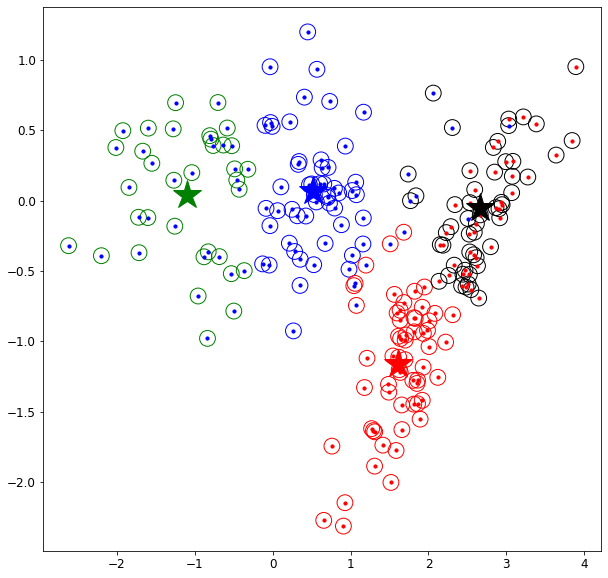

In [128]:
kmeans4 = KMeans(n_clusters=4, random_state=0).fit(Y)  # Compute k-means clustering.
c4 = kmeans4.cluster_centers_   # obtain centers of clusters, 4 in total

yPredict4 = kmeans4.predict(Y) 

# creating a mask based on the labels (4 clusters)
pYmask1 = yPredict4 == 0
pYmask2 = yPredict4 == 1
pYmask3 = yPredict4 == 2
pYmask4 = yPredict4 == 3

# plotting open circles for the predicted clusters
plt.figure(figsize=(10,10))
plt.scatter(Y[pYmask1,0], Y[pYmask1,1], s=250, facecolors='None', edgecolors='b')
plt.scatter(Y[pYmask2,0], Y[pYmask2,1], s=250, facecolors='None', edgecolors='r' )
plt.scatter(Y[pYmask3,0], Y[pYmask3,1], s=250, facecolors='None', edgecolors='g' )
plt.scatter(Y[pYmask4,0], Y[pYmask4,1], s=250, facecolors='None', edgecolors='k' )

# plotting the original clusters
plt.scatter(X1[:,0], X1[:,1], s= 10, c='r')
plt.scatter(X2[:,0], X2[:,1], s= 10, c = 'b')

# plotting cluster centers - colors of the star correspond to the open circles and represent that cluster center
plt.plot(c4[0,0],c4[0,1],'b*',ms=30)
plt.plot(c4[1,0],c4[1,1],'r*',ms=30)
plt.plot(c4[2,0],c4[2,1],'g*',ms=30)
plt.plot(c4[3,0],c4[3,1],'k*',ms=30)

---
# Task E (optional): Explore Hierarchical Clustering

(9 extra credit points)

Read about hierarchical clustering and Agglomerative Clustering on the extra lecture slides (available on canvas). Also, inspect code to use Agglomerative Clustering with sklearn in Lesson08c notebook and the documentation pages on the sklearn class `sklearn.cluster.AgglomerativeClustering`: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering. 

Then add code for the following in the cell below:
1) Use hierarchical clustering for the training dataset `Y`, instead of k-means.
2) Plot the resulting labels (color points by cluster to visualize the cluster) and compare to the true values (from the synthetic dataset).
3) Discuss accuracy of this algorithm versus k-means.

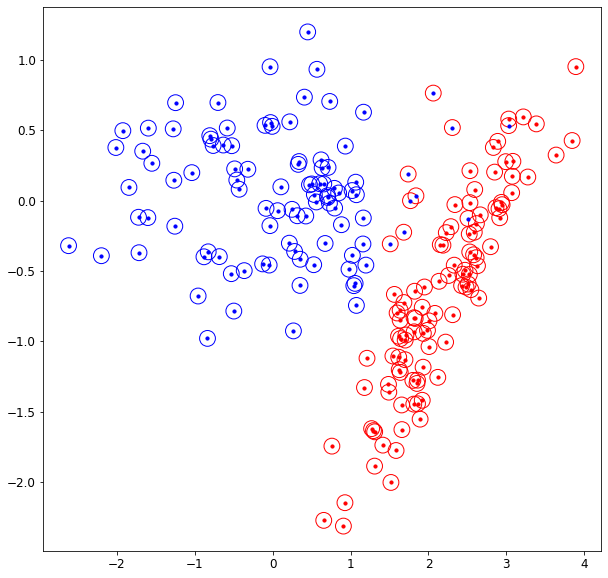

In [122]:
# heirarchical clustering using agglomerative clustering 

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering().fit(Y)

cmask = cluster.labels_ == 0

plt.figure(figsize=(10,10))
plt.scatter(Y[cmask,0], Y[cmask,1], s=250, facecolors='None', edgecolors='r') # plotting open circles for the predicted clusters
plt.scatter(Y[~cmask,0], Y[~cmask,1], s=250, facecolors='None', edgecolors='b')
plt.scatter(X1[:,0], X1[:,1], s= 10, c='r') # plotting the original clusters
plt.scatter(X2[:,0], X2[:,1], s= 10, c = 'b')


### Ans
Based on the number of mispredicted points, hierachical clustering seems to be more accurate compared to the k-means algorithm.